<a href="https://colab.research.google.com/github/mkhallymysore/lending_club/blob/main/Starter_Code_Loan_Approval_Lending_Club.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lending Club Loan Approval System

## Business Background

Lending Club is a peer-to-peer lending company where individuals can borrow loans, and investors can fund those loans. Lending Club was founded in 2006 by Renaud Laplanche as a peer-to-peer (P2P) lending platform in San Francisco. It was one of the pioneers in the online lending space, where individual borrowers could obtain loans, and individual or institutional investors could invest in these loans to earn interest. The platform allowed for a more direct connection between lenders and borrowers, bypassing traditional banking intermediaries.

Read more here https://en.wikipedia.org/wiki/LendingClub

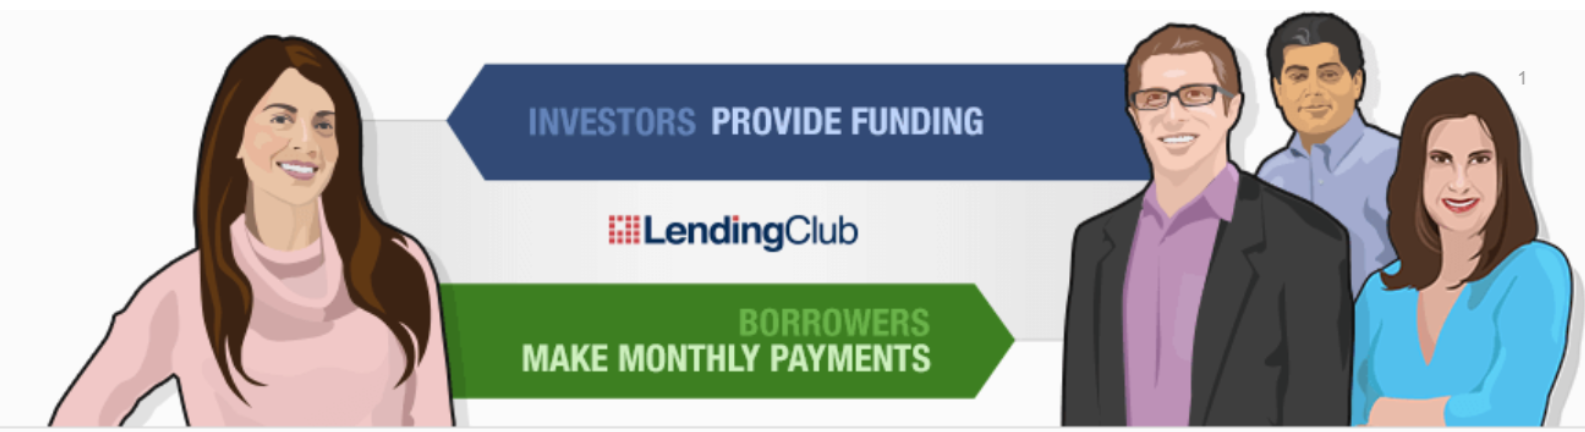

## Problem Statement

Now, whenever *Lending Club* approves a loan, there are two ways in which it is at risk:
- If LC approves a loan and the borrower fails to repay it on time
- If LC rejects a loan despite the borrower being capable of repaying the loan

Defaulting on loans can lead to significant financial losses for both the platform and investors. Similarly, not providing loans to credit-worthy customers can lead to missing out on potential revenue and profits. Therefore, a robust loan approval system is the need of the hour.

In the current loan approval process, underwriters evaluate loan applications by manually reviewing credit scores, income, debt, etc. and then, based on several parameters, either approve or reject a loan. This process is time-consuming and prone to errors.

Hence, Lending Club wants to build a loan approval system using Machine Learning models to automatically assess whether a given loan is likely to be repaid or whether the borrower is likely to default.

This is where you come in! As a budding data scientist, your goal is to help out Lending Club in creating this ML model that helps them predict whether a loan is likely to default or not.

## Data Understanding

You have been provided with around 38k loan application data from the Lending Club's website. The different columns and their description are mentioned below:

| Column Name         | Description                                                                                                                                                    |
|---------------------|----------------------------------------------------------------------------------------------------------------------------------------------------------------|
| id                  | A unique LC assigned ID for the loan listing. *(Integer)*                                                                                                       |
| member_id           | A unique LC assigned ID for the borrower member. *(Integer)*                                                                                                    |
| loan_amnt           | The listed amount of the loan applied for by the borrower. If at some point the credit department reduces the loan amount, it will be reflected in this value. *(Float)* |
| term                | The number of payments on the loan. Values are in months and can be either 36 or 60. *(Integer)*                                                                 |
| int_rate            | Interest rate on the loan. *(Float)*                                                                                                                            |
| installment         | The monthly payment owed by the borrower if the loan originates. *(Float)*                                                                                       |
| grade               | LC assigned loan grade. *(Categorical/String)*                                                                                                                  |
| sub_grade           | LC assigned loan subgrade. *(Categorical/String)*                                                                                                               |
| emp_length          | Employment length in years. Possible values are between 0 and 10, where 0 means less than one year and 10 means ten or more years. *(Integer)*                   |
| home_ownership      | The home ownership status provided by the borrower during registration. Values are: RENT, OWN, MORTGAGE, OTHER. *(Categorical/String)*                           |
| annual_inc          | The self-reported annual income provided by the borrower during registration. *(Float)*                                                                         |
| verification_status | Indicates if income was verified by LC, not verified, or if the income source was verified. *(Categorical/String)*                                               |
| purpose             | A category provided by the borrower for the loan request. *(Categorical/String)*                                                                                |
| dti                 | A ratio calculated using the borrower’s total monthly debt payments (excluding mortgage and the requested LC loan), divided by the borrower’s self-reported income. *(Float)* |
| delinq_2yrs         | The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years. *(Integer)*                                         |
| inq_last_6mths      | The number of inquiries in the past 6 months (excluding auto and mortgage inquiries). *(Integer)*                                                                |
| open_acc            | The number of open credit lines in the borrower's credit file. *(Integer)*                                                                                       |
| pub_rec             | Number of derogatory public records. *(Integer)*                                                                                                                |
| revol_bal           | Total credit revolving balance. *(Float)*                                                                                                                       |
| revol_util          | Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit. *(Float)*                             |
| total_acc           | The total number of credit lines currently in the borrower's credit file. *(Integer)*                                                                            |
| last_pymnt_amnt     | Last total payment amount received. *(Float)*                                                                                                                   |
| loan_status         | Current status of the loan. *(Categorical/String)*                                                                 
                  |

...

## Starter Code

### Necessary Imports

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
pd.set_option('display.max_columns', None)
import warnings
# Suppress all warnings
warnings.filterwarnings('ignore')

### Data Loading

In [38]:
## Load the dataset
df = pd.read_csv('/content/loans.csv')
df.head()

,id,member_id,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,purpose,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,last_pymnt_amnt,loan_status
0,1077501,1296599,5000,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,Verified,credit_card,27.65,0,1,3,0,13648,83.70%,9,171.62,Fully Paid
1,1077430,1314167,2500,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,car,1.00,0,5,3,0,1687,9.40%,4,119.66,Charged Off
2,1077175,1313524,2400,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,small_business,8.72,0,2,2,0,2956,98.50%,10,649.91,Fully Paid
3,1076863,1277178,10000,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,other,20.00,0,1,10,0,5598,21%,37,357.48,Fully Paid
4,1075269,1311441,5000,36 months,7.90%,156.46,A,A4,3 years,RENT,36000.0,Source Verified,wedding,11.20,0,3,9,0,7963,28.30%,12,161.03,Fully Paid


In [4]:
## Observe the first few rows
## Do you observe any issues?



*   Columns like int_rate, emp_length, revol_util have extra characters like %, + that needs to be removed.
*   These columns need to be converted to numerical columns
*   Columns grade,sub_grade are highly correlated. Analyze to see if both are needed in the dataset







In [39]:
## Check the dataframe structure - datatypes and number of non-null rows
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38770 entries, 0 to 38769
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   38770 non-null  int64  
 1   member_id            38770 non-null  int64  
 2   loan_amnt            38770 non-null  int64  
 3   term                 38770 non-null  object 
 4   int_rate             38770 non-null  object 
 5   installment          38770 non-null  float64
 6   grade                38770 non-null  object 
 7   sub_grade            38770 non-null  object 
 8   emp_length           37734 non-null  object 
 9   home_ownership       38770 non-null  object 
 10  annual_inc           38770 non-null  float64
 11  verification_status  38770 non-null  object 
 12  purpose              38770 non-null  object 
 13  dti                  38770 non-null  float64
 14  delinq_2yrs          38770 non-null  int64  
 15  inq_last_6mths       38770 non-null 

*   All columns except 2 have non null rows



In [40]:
## Check the shape
df.shape


(38770, 23)

In [41]:
df.describe()

,id,member_id,loan_amnt,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,last_pymnt_amnt
count,3.877000e+04,3.877000e+04,38770.000000,38770.000000,3.877000e+04,38770.000000,38770.000000,38770.000000,38770.000000,38770.000000,38770.000000,38770.000000,38770.000000
mean,6.769960e+05,8.430892e+05,11069.122388,322.629489,6.880025e+04,13.276704,0.146660,0.871473,9.278850,0.055404,13297.262626,22.059788,2735.887820
std,2.090226e+05,2.641345e+05,7362.292600,208.592815,6.416132e+04,6.676355,0.492197,1.071444,4.401871,0.237727,15861.575434,11.420556,4486.352373
min,5.473400e+04,7.069900e+04,500.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000
25%,5.127032e+05,6.619100e+05,5325.000000,165.740000,4.000000e+04,8.130000,0.000000,0.000000,6.000000,0.000000,3654.000000,13.000000,216.822500
50%,6.579935e+05,8.410920e+05,9737.500000,278.150000,5.892350e+04,13.370000,0.000000,1.000000,9.000000,0.000000,8777.000000,20.000000,565.400000
75%,8.287202e+05,1.037010e+06,15000.000000,426.100000,8.200000e+04,18.560000,0.000000,1.000000,12.000000,0.000000,16938.000000,29.000000,3425.470000
max,1.077501e+06,1.314167e+06,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,44.000000,4.000000,149588.000000,90.000000,36115.200000


*  There are 38770 rows and 23 columns in the dataset

In [42]:
## Check the missing values across the columns
missing_values = df.isnull().sum()
print(missing_values)
df.describe(include=['object'])


id                        0
member_id                 0
loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
emp_length             1036
home_ownership            0
annual_inc                0
verification_status       0
purpose                   0
dti                       0
delinq_2yrs               0
inq_last_6mths            0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util               50
total_acc                 0
last_pymnt_amnt           0
loan_status               0
dtype: int64


,term,int_rate,grade,sub_grade,emp_length,home_ownership,verification_status,purpose,revol_util,loan_status
count,38770,38770,38770,38770,37734,38770,38770,38770,38720,38770
unique,2,371,7,35,11,5,3,14,1088,2
top,36 months,10.99%,B,A4,10+ years,RENT,Not Verified,debt_consolidation,0%,Fully Paid
freq,29096,928,11726,2874,8547,18550,16732,18145,960,33136


#### Observations
*   There are 38770 rows and 23 columns in the dataset
*   The column emp_length has 1036 null (missing) value
*   The column revol_util has 50 missing values
*   Analyze to see if these rows need to be dropped or imputed
*   Majority of loaners are Not Verified, Rent a home
*   Majority of loans are of 3 year term and fully paid

In [43]:
# create a binary column for target variable
df['loan_status_num'] = df['loan_status'].astype('category').cat.codes
df['loan_status_num'] = df['loan_status'].map({'Fully Paid': 0, 'Charged Off': 1})
df.head()
# visualize distribution of target variable
# KDE plot of the target column
# sns.kdeplot(df['loan_status_num'], shade=True)

# # Adding labels and title
# plt.xlabel('loan_status_num')
# plt.ylabel('Density')
# plt.title('KDE Plot of Loan status')

# # Show plot
# plt.show()

,id,member_id,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,purpose,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,last_pymnt_amnt,loan_status,loan_status_num
0,1077501,1296599,5000,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,Verified,credit_card,27.65,0,1,3,0,13648,83.70%,9,171.62,Fully Paid,0
1,1077430,1314167,2500,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,car,1.00,0,5,3,0,1687,9.40%,4,119.66,Charged Off,1
2,1077175,1313524,2400,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,small_business,8.72,0,2,2,0,2956,98.50%,10,649.91,Fully Paid,0
3,1076863,1277178,10000,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,other,20.00,0,1,10,0,5598,21%,37,357.48,Fully Paid,0
4,1075269,1311441,5000,36 months,7.90%,156.46,A,A4,3 years,RENT,36000.0,Source Verified,wedding,11.20,0,3,9,0,7963,28.30%,12,161.03,Fully Paid,0


### Data Cleaning

- Perform missing value treatment
- Remove extra symbols, characters, etc. from appropriate columns

In [44]:
## Remove extra symbols, characters
df['emp_length'] = df['emp_length'].replace({
    '10+ years': 11,
    '9 years': 9,
    '8 years': 8,
    '7 years': 7,
    '6 years': 6,
    '5 years': 5,
    '4 years': 4,
    '3 years': 3,
    '2 years': 2,
    '1 year': 1,
    '< 1 year': 0,
    'n/a': np.nan
})

# Convert to numeric
df['emp_length'] = pd.to_numeric(df['emp_length'])

#remove % from int_rate, revol_util and convert to float
df['int_rate'] = df['int_rate'].astype(str).str.replace('%', '').astype(float)
df['revol_util'] = df['revol_util'].astype(str).str.replace('%', '').astype(float)
#remove months from term
df['term'] = df['term'].str.replace('months', '')
#Add a numeric column to check emp_length > 10+ years
df['emp_10plus'] = (df['emp_length'] >= 11).astype(int)
df.head()


,id,member_id,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,purpose,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,last_pymnt_amnt,loan_status,loan_status_num,emp_10plus
0,1077501,1296599,5000,36,10.65,162.87,B,B2,11.0,RENT,24000.0,Verified,credit_card,27.65,0,1,3,0,13648,83.7,9,171.62,Fully Paid,0,1
1,1077430,1314167,2500,60,15.27,59.83,C,C4,0.0,RENT,30000.0,Source Verified,car,1.00,0,5,3,0,1687,9.4,4,119.66,Charged Off,1,0
2,1077175,1313524,2400,36,15.96,84.33,C,C5,11.0,RENT,12252.0,Not Verified,small_business,8.72,0,2,2,0,2956,98.5,10,649.91,Fully Paid,0,1
3,1076863,1277178,10000,36,13.49,339.31,C,C1,11.0,RENT,49200.0,Source Verified,other,20.00,0,1,10,0,5598,21.0,37,357.48,Fully Paid,0,1
4,1075269,1311441,5000,36,7.90,156.46,A,A4,3.0,RENT,36000.0,Source Verified,wedding,11.20,0,3,9,0,7963,28.3,12,161.03,Fully Paid,0,0


In [45]:
## Write your code
# check how many rows have loan_status = 'Charged Off'
count_co = df[df['loan_status'] == 'Charged Off'].shape[0]
print(count_co)
# #check how many rows with missing values in emp_length are charged off to evaluate if we can drop these rows with missing values
count_missing_el = df[(df['loan_status'] == 'Charged Off') & (df['emp_length'].isnull())].shape[0]
print(count_missing_el)
#check how many rows with missing values in revol_util are charged off to evaluate if we can drop these rows with missing values

count_missing_rb = df[(df['loan_status'] == 'Charged Off') & (df['revol_util'].isnull())].shape[0]
print(count_missing_rb)

5634
228
16


Since only 228 rows with missing emp_length values have a loan_staus value of Charged_Off and rest all are Fully Paid we can removed the rows with missing emp_length values


In [46]:
## Write your code
df = df.dropna(subset=['emp_length'])

In [47]:
## Write your code
missing_values = df.isnull().sum()
print(missing_values)
#check how many rows with missing values in revol_util are charged off to evaluate if we can drop these rows with missing values
count_missing_rb = df[(df['loan_status'] == 'Charged Off') & (df['revol_util'].isnull())].shape[0]
print ('')
print(f'count of rows with missing revol_util values and loan status Charged Off:{count_missing_rb}')


id                      0
member_id               0
loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
purpose                 0
dti                     0
delinq_2yrs             0
inq_last_6mths          0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util             47
total_acc               0
last_pymnt_amnt         0
loan_status             0
loan_status_num         0
emp_10plus              0
dtype: int64

count of rows with missing revol_util values and loan status Charged Off:15


Since only 15 rows with missing revol_util values have a loan_staus value of Charged_Off and rest all are Fully Paid we can removed the rows with missing revol_util values

In [48]:
df = df.dropna(subset=['revol_util'])

In [49]:
missing_values = df.isnull().sum()
print(missing_values)

id                     0
member_id              0
loan_amnt              0
term                   0
int_rate               0
installment            0
grade                  0
sub_grade              0
emp_length             0
home_ownership         0
annual_inc             0
verification_status    0
purpose                0
dti                    0
delinq_2yrs            0
inq_last_6mths         0
open_acc               0
pub_rec                0
revol_bal              0
revol_util             0
total_acc              0
last_pymnt_amnt        0
loan_status            0
loan_status_num        0
emp_10plus             0
dtype: int64


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37687 entries, 0 to 38769
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   37687 non-null  int64  
 1   member_id            37687 non-null  int64  
 2   loan_amnt            37687 non-null  int64  
 3   term                 37687 non-null  object 
 4   int_rate             37687 non-null  float64
 5   installment          37687 non-null  float64
 6   grade                37687 non-null  object 
 7   sub_grade            37687 non-null  object 
 8   emp_length           37687 non-null  float64
 9   home_ownership       37687 non-null  object 
 10  annual_inc           37687 non-null  float64
 11  verification_status  37687 non-null  object 
 12  purpose              37687 non-null  object 
 13  dti                  37687 non-null  float64
 14  delinq_2yrs          37687 non-null  int64  
 15  inq_last_6mths       37687 non-null  int6

##### Dropping the unnecessary columns

- Columns which are not required for analysis - `id`, `member_id`
- Columns which are not available at the time of loan approval (Check the data dictionary and problem statement to understand this more) - `installment` and `last_pymnt_amnt`

In [51]:
## Drop the above columns
df.drop(['id','member_id'], axis=1, inplace=True)



In [52]:
## Check the dataframe again
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,purpose,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,last_pymnt_amnt,loan_status,loan_status_num,emp_10plus
0,5000,36,10.65,162.87,B,B2,11.0,RENT,24000.0,Verified,credit_card,27.65,0,1,3,0,13648,83.7,9,171.62,Fully Paid,0,1
1,2500,60,15.27,59.83,C,C4,0.0,RENT,30000.0,Source Verified,car,1.00,0,5,3,0,1687,9.4,4,119.66,Charged Off,1,0
2,2400,36,15.96,84.33,C,C5,11.0,RENT,12252.0,Not Verified,small_business,8.72,0,2,2,0,2956,98.5,10,649.91,Fully Paid,0,1
3,10000,36,13.49,339.31,C,C1,11.0,RENT,49200.0,Source Verified,other,20.00,0,1,10,0,5598,21.0,37,357.48,Fully Paid,0,1
4,5000,36,7.90,156.46,A,A4,3.0,RENT,36000.0,Source Verified,wedding,11.20,0,3,9,0,7963,28.3,12,161.03,Fully Paid,0,0


Perform any additional data preparation steps if needed

In [53]:
# Define grade order
grade_order = {'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7}

# Convert 'grade' to numeric
df['grade_num'] = df['grade'].map(grade_order)

# Convert 'sub_grade' to numeric (e.g., B3 -> 2.2 for grade B, level 3)
df['sub_grade_num'] = df['sub_grade'].apply(
    lambda x: grade_order[x[0]] + (int(x[1]) - 1) / 10
)

# Compute correlation to check if both the colums are needed
correlation = df[['grade_num', 'sub_grade_num']].corr().iloc[0, 1]
print(f"Correlation between grade and sub_grade: {correlation:.4f}")


Correlation between grade and sub_grade: 0.9950


In [54]:
## Write the code
# create a random subset of the dataset for analysis. Preserve the current distribution of loan_status
# Total number of rows you want in the subset
n_total = 25000   # Change this to your target subset size

# Calculate proportional samples based on current distribution
proportions = df['loan_status'].value_counts(normalize=True)
print(f'current proportions:{proportions}')
print('')
n_per_class = (proportions * n_total).round().astype(int)
print(f'proportional samples:{n_per_class}')
print('')

# Sample proportionally from each class
df_subset = pd.concat([
    df[df['loan_status'] == cls].sample(n=n, random_state=42)
    for cls, n in n_per_class.items()
])

# Shuffle the final subset (optional)
df_subset = df_subset.sample(frac=1, random_state=42).reset_index(drop=True)

# Check the balance
print(df_subset['loan_status'].value_counts(normalize=True))
df_subset.head()

current proportions:loan_status
Fully Paid     0.856953
Charged Off    0.143047
Name: proportion, dtype: float64

proportional samples:loan_status
Fully Paid     21424
Charged Off     3576
Name: proportion, dtype: int64

loan_status
Fully Paid     0.85696
Charged Off    0.14304
Name: proportion, dtype: float64


,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,purpose,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,last_pymnt_amnt,loan_status,loan_status_num,emp_10plus,grade_num,sub_grade_num
0,5000,36,15.31,174.08,D,D3,0.0,RENT,85000.0,Not Verified,debt_consolidation,9.06,0,0,5,0,9523,75.0,13,3096.40,Fully Paid,0,0,4,4.2
1,5000,36,12.21,166.58,B,B5,11.0,OWN,24000.0,Not Verified,debt_consolidation,14.05,0,0,7,1,5122,73.2,12,166.58,Charged Off,1,1,2,2.4
2,3600,36,7.37,111.77,A,A1,11.0,MORTGAGE,62004.0,Not Verified,major_purchase,3.50,0,0,6,0,5514,19.5,20,121.43,Fully Paid,0,1,1,1.0
3,25000,36,15.65,874.62,D,D4,11.0,MORTGAGE,92000.0,Verified,debt_consolidation,12.44,0,2,28,0,29367,18.3,52,913.68,Fully Paid,0,1,4,4.3
4,8900,36,12.18,296.37,B,B4,2.0,RENT,49500.0,Not Verified,debt_consolidation,12.68,0,3,6,0,9943,61.8,15,310.29,Fully Paid,0,0,2,2.3


### Exploratory Data Analysis

Let's understand the key drivers of loan default using EDA. This will form the preliminary analysis before we start with our machine learning model building part. We can understand the distributions of different variables, how they are related with loan default and so on.

#### Univariate Analysis

Perform univariate analysis on the following variables. Use visualizations and summary statistics wherever necessary. Document your overall observations as well
- `loan_status`
- `term`
- `grade`
- `purpose`
- `loan_amnt`
- `annual_inc`

*Note* - You can do additional analysis as well

loan status counts:loan_status
Fully Paid     21424
Charged Off     3576
Name: count, dtype: int64

loan status percentage distribution :loan_status
Fully Paid     85.696
Charged Off    14.304
Name: proportion, dtype: float64


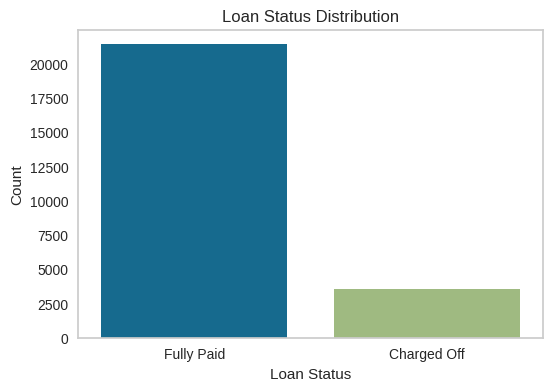

In [55]:

## Write Code here
#loan_status - frequency counts
loan_status_counts = df_subset['loan_status'].value_counts()
print(f'loan status counts:{loan_status_counts}')
print ('')
#loan_status percentage distribution
loan_status_percent = df_subset['loan_status'].value_counts(normalize=True) * 100
print(f'loan status percentage distribution :{loan_status_percent}')
#create a bar plot
# Create bar plot for loan_status
plt.figure(figsize=(6, 4))
sns.countplot(data=df_subset, x='loan_status', hue='loan_status')
plt.title('Loan Status Distribution')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.grid(axis='y')
plt.show()

The loan_status has around 86% of Fully Paid Vs 14% Charged Off. In a subset of 15000 rows, around 12854 rows are Fully Paid and  2146 are charged off. The data is highly imbalanced

term frequency dist:term
 36     18712
 60      6288
Name: count, dtype: int64

term percentage dist:term
 36     74.848
 60     25.152
Name: proportion, dtype: float64



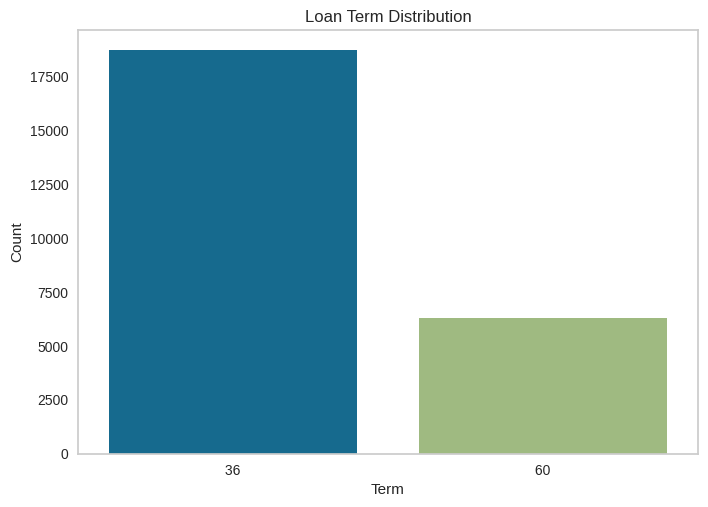

In [56]:
## Frequency count for Term
term_counts = df_subset['term'].value_counts()
print(f'term frequency dist:{term_counts}')
print('')
## Percentage distribution for Term
term_percent = df_subset['term'].value_counts(normalize=True) * 100
print(f'term percentage dist:{term_percent}')
print('')
#Bar Plot
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df_subset, x='term', hue='term')
plt.title('Loan Term Distribution')
plt.xlabel('Term')
plt.ylabel('Count')
plt.grid(axis='y')
plt.show()


Majority of loans are 3 year duration (74%). Data is imbalanced

 grade frequency dist: grade
A    6376
B    7541
C    5060
D    3404
E    1788
F     639
G     192
Name: count, dtype: int64

grade percentage dist:grade
A    25.504
B    30.164
C    20.240
D    13.616
E     7.152
F     2.556
G     0.768
Name: proportion, dtype: float64



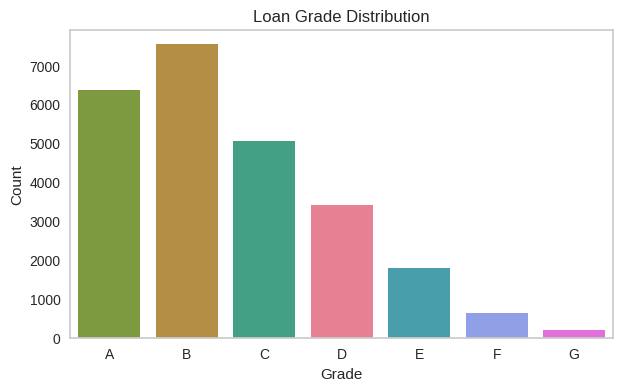

In [57]:
## grade frequency distribution
grade_counts = df_subset['grade'].value_counts().sort_index()
print(f' grade frequency dist: {grade_counts}')
print('')
## grade percentage distribution
grade_percent = df_subset['grade'].value_counts(normalize=True).sort_index() * 100
print(f'grade percentage dist:{grade_percent}')
print('')
## Bar Plot

plt.figure(figsize=(7, 4))
sns.countplot(data=df_subset, x='grade', order=sorted(df['grade'].dropna().unique()),hue='grade')
plt.title('Loan Grade Distribution')
plt.xlabel('Grade')
plt.ylabel('Count')
plt.grid(axis='y')
plt.show()

Majoirty of loans are grade A / B type low risk loans (55% combined). High risk loans (D-G) are fewer (around 10%). Data is fairly distributed for the first 3 categories(A-C) but becomes imbalanced for the categories D-G

 purpose frequency dist: purpose
debt_consolidation    11801
credit_card            3262
other                  2497
home_improvement       1867
major_purchase         1411
small_business         1104
car                     960
wedding                 581
medical                 422
moving                  360
house                   241
vacation                224
educational             211
renewable_energy         59
Name: count, dtype: int64

purpose percentage dist:purpose
debt_consolidation    47.204
credit_card           13.048
other                  9.988
home_improvement       7.468
major_purchase         5.644
small_business         4.416
car                    3.840
wedding                2.324
medical                1.688
moving                 1.440
house                  0.964
vacation               0.896
educational            0.844
renewable_energy       0.236
Name: proportion, dtype: float64



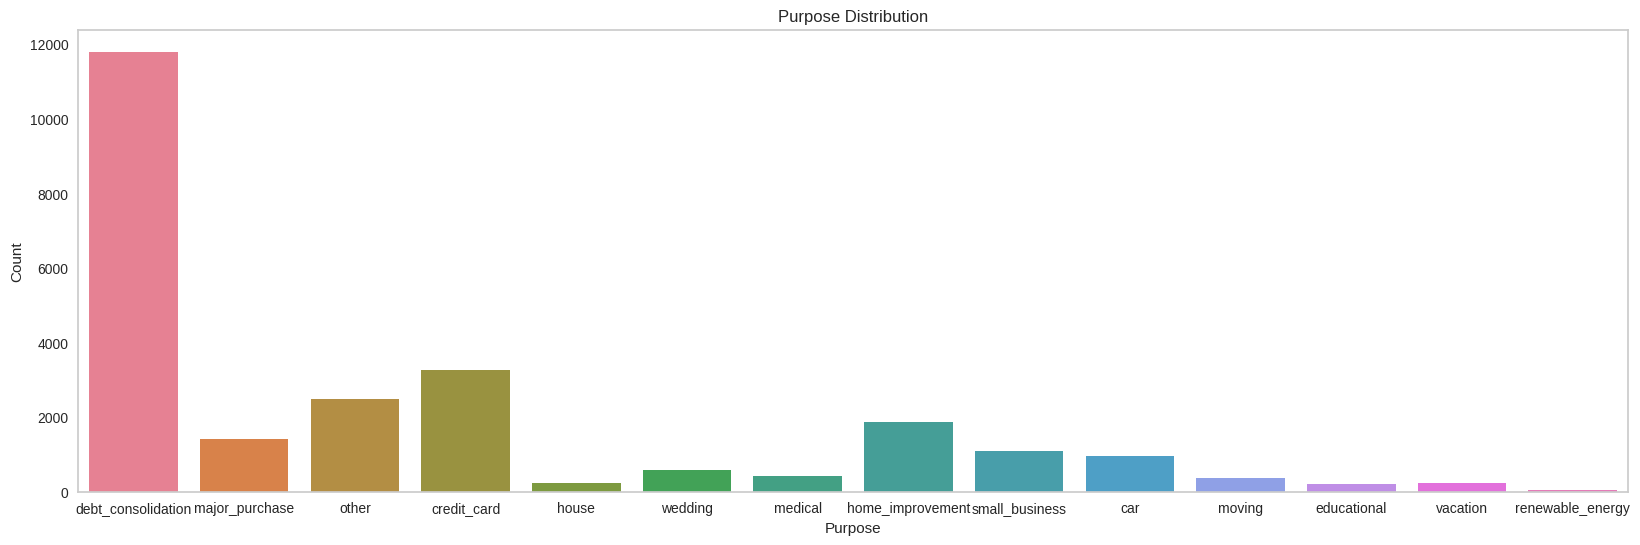

In [58]:
## ## purpose frequency distribution
purpose_counts = df_subset['purpose'].value_counts()
print(f' purpose frequency dist: {purpose_counts}')
print('')
## grade percentage distribution
purpose_percent = df_subset['purpose'].value_counts(normalize=True) * 100
print(f'purpose percentage dist:{purpose_percent}')
print('')
## Bar Plot

plt.figure(figsize=(20, 6))
sns.countplot(data=df_subset, x='purpose',hue='purpose')
plt.title('Purpose Distribution')
plt.xlabel('Purpose')
plt.ylabel('Count')
plt.grid(axis='y')
plt.show()

Majority of the loans are for debt consolidation (47%).credit cards form the next highest (around 13%). Data is highly imbalanced

loan amount frequency dist:loan_amnt
10000    1866
12000    1471
5000     1333
6000     1203
15000    1183
         ... 
16325       1
22875       1
29850       1
6775        1
19900       1
Name: count, Length: 784, dtype: int64

loan amount percentage distribution :loan_amnt
10000    7.464
12000    5.884
5000     5.332
6000     4.812
15000    4.732
         ...  
16325    0.004
22875    0.004
29850    0.004
6775     0.004
19900    0.004
Name: proportion, Length: 784, dtype: float64


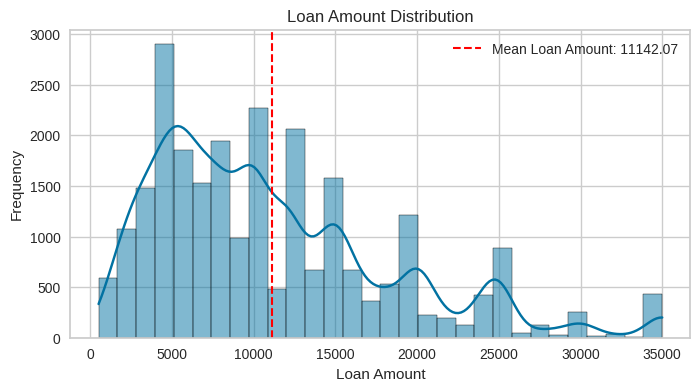

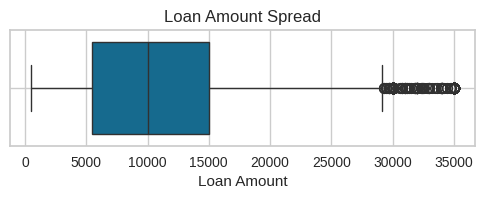

In [59]:
#loan_amnt - frequency counts
loan_amnt_counts = df_subset['loan_amnt'].value_counts()
print(f'loan amount frequency dist:{loan_amnt_counts}')
print ('')
#loan_status percentage distribution
loan_amnt_percent = df_subset['loan_amnt'].value_counts(normalize=True) * 100
print(f'loan amount percentage distribution :{loan_amnt_percent}')
#create a bar plot
# Create histogram  for frequency distribution plot of loan_MT
plt.figure(figsize=(8, 4))
sns.histplot(data=df_subset, x='loan_amnt', bins=30, kde=True)
plt.title('Loan Amount Distribution')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
# Add a vertical line for the mean age
mean_loanamt = df_subset['loan_amnt'].mean()
plt.axvline(mean_loanamt, color='red', linestyle='--', linewidth=1.5, label=f'Mean Loan Amount: {mean_loanamt:.2f}')
# Add a legend
plt.legend()
plt.grid(True)
plt.show()
#Create box plot to detect outliers
plt.figure(figsize=(6, 1.5))
sns.boxplot(data=df_subset, x='loan_amnt')
plt.title('Loan Amount Spread')
plt.xlabel('Loan Amount')
plt.grid(True)
plt.show()

In [60]:
#describe the dataset subset
df_subset.describe()


,loan_amnt,int_rate,installment,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,last_pymnt_amnt,loan_status_num,emp_10plus,grade_num,sub_grade_num
count,25000.000000,25000.000000,25000.000000,25000.000000,2.500000e+04,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000
mean,11142.071000,11.994556,324.623787,5.141600,6.930377e+04,13.285981,0.148000,0.870160,9.293560,0.052760,13364.115320,48.969528,22.084080,2746.009294,0.143040,0.223800,2.574880,2.780396
std,7384.396314,3.696351,208.898914,3.882648,5.980992e+04,6.669406,0.503693,1.071591,4.397008,0.232333,15887.299585,28.375358,11.406671,4501.937162,0.350121,0.416798,1.384308,1.364117
min,500.000000,5.420000,15.690000,0.000000,4.000000e+03,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,5500.000000,9.237500,167.540000,2.000000,4.100000e+04,8.180000,0.000000,0.000000,6.000000,0.000000,3657.000000,25.500000,13.000000,220.550000,0.000000,0.000000,1.000000,1.400000
50%,10000.000000,11.830000,280.280000,4.000000,5.980028e+04,13.370000,0.000000,1.000000,9.000000,0.000000,8858.000000,49.450000,20.000000,574.300000,0.000000,0.000000,2.000000,2.400000
75%,15000.000000,14.540000,428.155000,9.000000,8.274726e+04,18.590000,0.000000,1.000000,12.000000,0.000000,17016.000000,72.600000,29.000000,3447.377500,0.000000,0.000000,3.000000,3.400000
max,35000.000000,24.590000,1305.190000,11.000000,3.900000e+06,29.990000,11.000000,8.000000,44.000000,4.000000,149588.000000,99.900000,90.000000,35613.680000,1.000000,1.000000,7.000000,7.400000


Mean: 11100.435000 - indicates average loan amount is around 11,000
tandard Deviation: 7402 - indicates significant variation in loan  amounts

Min and Max : The minimum amount of loan taken was 500 and max was 35,000
Percentiles
*   25th Percentile : 5275(lower range)
*   Median (50th Percentile) : 9800
*   75th Percentile: 15,000
*   Data indicates presence of outliers
   









**Observations**

- Document your observations here

### Interpretation of the Loan Amount Distribution Plot

The plot visualizes the distribution of the loan amount of lending club dataset. Here are the key insights:

   - The distribution of loan amounts is right-skewed, with a majority of amounts clustered between 5000 to 15,000
   - There is a peak around the age of 10,000 (1058), indicating that this loan amount had the highest number of borrowers.
   - Mean Amount: 11,100.43. The mean amount falls within the most frequent loan amount group, aligning with the peak of the distribution.
   - Loan Amount range: From 500 to 35,000, showing a wide age range of borrowing amoints
  

Annual Income frequency dist:annual_inc
60000.0    944
50000.0    681
40000.0    563
45000.0    560
30000.0    526
          ... 
61657.0      1
80690.0      1
60900.0      1
98056.0      1
29435.0      1
Name: count, Length: 3705, dtype: int64

Annual Income percentage distribution :annual_inc
60000.0    3.776
50000.0    2.724
40000.0    2.252
45000.0    2.240
30000.0    2.104
           ...  
61657.0    0.004
80690.0    0.004
60900.0    0.004
98056.0    0.004
29435.0    0.004
Name: proportion, Length: 3705, dtype: float64


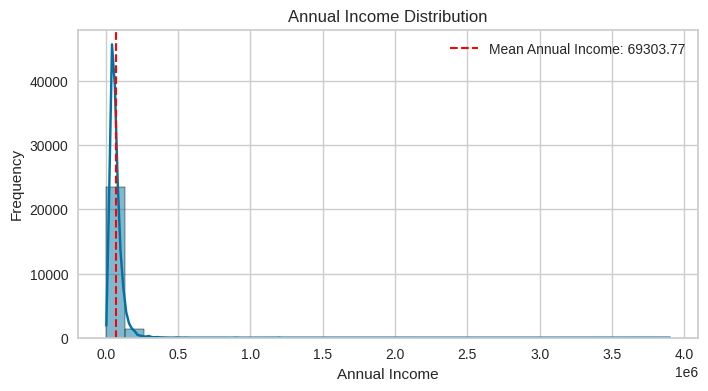

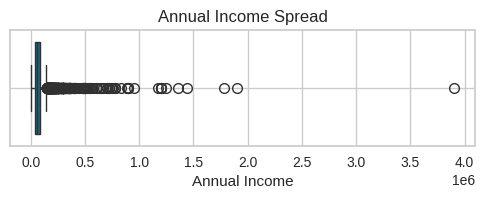

In [61]:
#annual_inc - frequency counts
annual_inc_counts = df_subset['annual_inc'].value_counts()
print(f'Annual Income frequency dist:{annual_inc_counts}')
print ('')
#loan_status percentage distribution
annual_inc_percent = df_subset['annual_inc'].value_counts(normalize=True) * 100
print(f'Annual Income percentage distribution :{annual_inc_percent}')
#create a bar plot
# Create histogram  for frequency distribution plot of loan_MT
plt.figure(figsize=(8, 4))
sns.histplot(data=df_subset, x='annual_inc', bins=30, kde=True)
plt.title('Annual Income Distribution')
plt.xlabel('Annual Income')
plt.ylabel('Frequency')
# Add a vertical line for the mean age
mean_annualinc = df_subset['annual_inc'].mean()
plt.axvline(mean_annualinc, color='red', linestyle='--', linewidth=1.5, label=f'Mean Annual Income: {mean_annualinc:.2f}')
# Add a legend
plt.legend()
plt.grid(True)
plt.show()
#Create box plot to detect outliers
plt.figure(figsize=(6, 1.5))
sns.boxplot(data=df_subset, x='annual_inc')
plt.title('Annual Income Spread')
plt.xlabel('Annual Income')
plt.grid(True)
plt.show()

#### Bivariate Analysis

For the bivariate analysis, you can perform multiple analysis such as follows:

- How the default rate varies across the different variables
- Correlation Matrix
- etc.

In [62]:
#Default rate by grade
default_by_grade = df_subset.groupby('grade')['loan_status_num'].mean().sort_index()
print(f'default by grade:{default_by_grade}')
print('')
# #Repayment rate by grade
repayment_by_grade = 1 - default_by_grade
print(f'repayment by grade:{repayment_by_grade}')


default by grade:grade
A    0.060069
B    0.115767
C    0.172530
D    0.212691
E    0.263982
F    0.309859
G    0.276042
Name: loan_status_num, dtype: float64

repayment by grade:grade
A    0.939931
B    0.884233
C    0.827470
D    0.787309
E    0.736018
F    0.690141
G    0.723958
Name: loan_status_num, dtype: float64


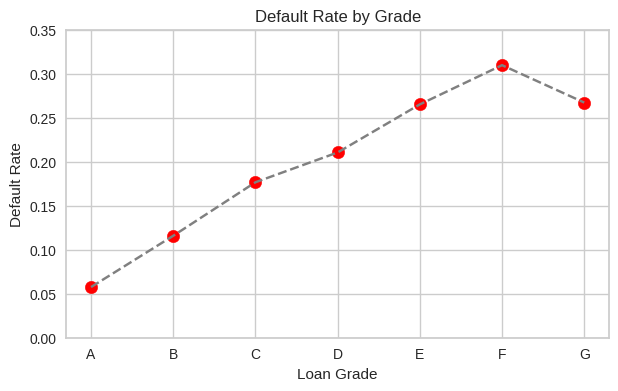

In [63]:
import pandas as pd
import matplotlib.pyplot as plt

# Default rate data by grade (computed as 1 - repayment rate)
data = {
    'grade': ['A', 'B', 'C', 'D', 'E', 'F', 'G'],
    'repayment_rate': [0.942423, 0.884132, 0.823337, 0.789474, 0.734842, 0.690289, 0.732759]
}

# Convert to DataFrame
df_grade = pd.DataFrame(data)

# Calculate default rate
df_grade['default_rate'] = 1 - df_grade['repayment_rate']

# Create scatter plot
plt.figure(figsize=(7, 4))
plt.scatter(df_grade['grade'], df_grade['default_rate'], color='red', s=80)
plt.plot(df_grade['grade'], df_grade['default_rate'], linestyle='--', color='gray')
plt.title('Default Rate by Grade')
plt.xlabel('Loan Grade')
plt.ylabel('Default Rate')
plt.grid(True)
plt.ylim(0, 0.35)
plt.show()

*   There is an inverse relationship between loan grade and repayment
*   Higher grades (A,B) have more reliable borrowers
*   Grade A has around 5.8% default rate while B has 11.6% default rate
*   Lower grades (E,F,G) are risk prone
*   In grade E, G 1 in 4 default (26.5%, 26.7% default rate), in grade F, 1in 3 default (30.9 % default rate)



In [64]:
#Default rate by emp_length
default_by_emp_length = df_subset.groupby('emp_length')['loan_status_num'].mean().sort_index()
print(f'default by emp length: {default_by_emp_length}')
print('')
# #Default rate by emp_length
repayment_by_emp_length = 1 - default_by_emp_length
print(f'repayment by emp length: {repayment_by_emp_length}')

default by emp length: emp_length
0.0     0.140635
1.0     0.145207
2.0     0.136552
3.0     0.141723
4.0     0.130731
5.0     0.134562
6.0     0.147281
7.0     0.153982
8.0     0.132196
9.0     0.127607
11.0    0.156390
Name: loan_status_num, dtype: float64

repayment by emp length: emp_length
0.0     0.859365
1.0     0.854793
2.0     0.863448
3.0     0.858277
4.0     0.869269
5.0     0.865438
6.0     0.852719
7.0     0.846018
8.0     0.867804
9.0     0.872393
11.0    0.843610
Name: loan_status_num, dtype: float64


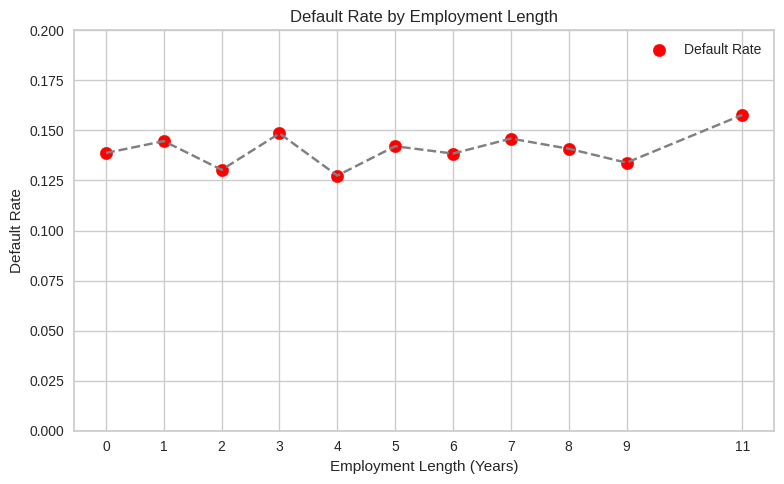

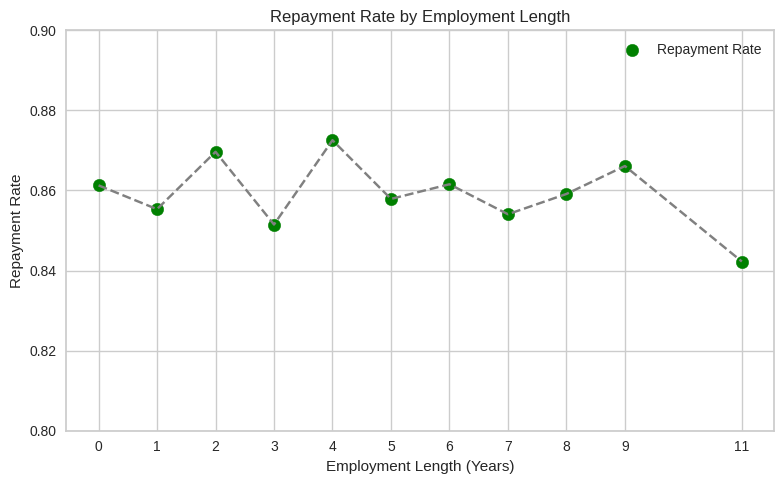

In [65]:
import pandas as pd
import matplotlib.pyplot as plt

# Data: repayment rate and default rate by employment length
emp_length = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11]
repayment_rate = [0.861278, 0.855336, 0.869663, 0.851504, 0.872557,
                  0.857895, 0.861556, 0.854071, 0.859130, 0.866109, 0.842263]
default_rate = [1 - r for r in repayment_rate]

# Create DataFrame
df_emp = pd.DataFrame({
    'emp_length': emp_length,
     'repayment_rate': repayment_rate,
    'default_rate': default_rate
})


# Scatter plot for default rate by employment length
plt.figure(figsize=(8, 5))
plt.scatter(df_emp['emp_length'], df_emp['default_rate'], color='red', s=80, label='Default Rate')
plt.plot(df_emp['emp_length'], df_emp['default_rate'], linestyle='--', color='gray')
plt.title('Default Rate by Employment Length')
plt.xlabel('Employment Length (Years)')
plt.ylabel('Default Rate')
plt.grid(True)
plt.xticks(emp_length)
plt.ylim(0, 0.2)
plt.legend()
plt.tight_layout()
plt.show()

# Scatter plot for repayment rate by employment length
plt.figure(figsize=(8, 5))
plt.scatter(df_emp['emp_length'], df_emp['repayment_rate'], color='green', s=80, label='Repayment Rate')
plt.plot(df_emp['emp_length'], df_emp['repayment_rate'], linestyle='--', color='gray')
plt.title('Repayment Rate by Employment Length')
plt.xlabel('Employment Length (Years)')
plt.ylabel('Repayment Rate')
plt.grid(True)
plt.xticks(emp_length)
plt.ylim(0.8, 0.9)
plt.legend()
plt.tight_layout()
plt.show()



*   Employment lengths from 0 -9 years show a similar default rate of 13-15% and repayment rate of 85-87%
*   Employment lengths of 10+ years have the highest default rate of 15.8% and lowest repayment rate of 84.2%
*   ***Employment length is less predictive than loan grade though it has some influence ***


In [66]:
#Default rate by annual income
default_by_annual_inc = df_subset.groupby('annual_inc')['loan_status_num'].mean().sort_index()
print(f'default_rate by Annual Income:{default_by_annual_inc}')

default_rate by Annual Income:annual_inc
4000.0       0.0
4800.0       0.0
5000.0       0.0
5500.0       0.0
6000.0       0.5
            ... 
1362000.0    0.0
1440000.0    0.0
1782000.0    0.0
1900000.0    0.0
3900000.0    0.0
Name: loan_status_num, Length: 3705, dtype: float64


*   There's no extreme fluctuation in the default rate from low to high incomes.

*   By itself Annual income may not be a good predictor of default






In [67]:
#Write your code here
# numeric_df = df_subset.select_dtypes(include=[np.number])
# #  Compute correlation matrix
# correlation_matrix = numeric_df.corr()

# # Plot heatmap
# plt.figure(figsize=(16, 15))
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
# plt.title('Correlation Matrix')
# plt.tight_layout()
# plt.show()
# Compute correlation matrix
correlation_matrix = df_subset.corr(numeric_only=True)

# Get correlation of all variables with the target variable
target_correlation = correlation_matrix['loan_status_num'].drop('loan_status_num')

# Sort for better readability
target_correlation = target_correlation.sort_values(ascending=False)

# Display
print(target_correlation)

int_rate           0.205208
sub_grade_num      0.196966
grade_num          0.194384
revol_util         0.098336
inq_last_6mths     0.070721
loan_amnt          0.057068
pub_rec            0.052288
dti                0.044175
installment        0.025950
emp_10plus         0.020474
delinq_2yrs        0.014914
emp_length         0.014908
revol_bal          0.006598
open_acc          -0.003762
total_acc         -0.021551
annual_inc        -0.045209
last_pymnt_amnt   -0.219074
Name: loan_status_num, dtype: float64


*   Correlation of variables With target (loan_status_num) (Default)
*   A positive correalation indicates indicates a variable is associated with a higher likelihood of default.
Most influential variables relating to default
*   int_rate (+0.210)
*   grade_num(+0.196)
*  grade_num(+0.198)






In [ ]:
#Write your code here

#### Pre-ML Data Pre-Processing

Before building the machine learning model, we shall perform
- encoding on all the categorical variables
- handle class imbalance
- train-test split
- scaling

##### Encoding variables

In [68]:
# List categorical columns to encode
categorical_df = df_subset.select_dtypes(include=['object', 'category'])
categorical_cols = ['term', 'grade',
                    'home_ownership', 'verification_status']

#categorical_df.head()
# Apply one-hot encoding
df_encoded = pd.get_dummies(categorical_df, columns=categorical_cols, drop_first=True)

#  Check resulting columns
print(df_encoded.columns)
df_encoded.head()

Index(['sub_grade', 'purpose', 'loan_status', 'term_ 60 ', 'grade_B',
       'grade_C', 'grade_D', 'grade_E', 'grade_F', 'grade_G',
       'home_ownership_NONE', 'home_ownership_OTHER', 'home_ownership_OWN',
       'home_ownership_RENT', 'verification_status_Source Verified',
       'verification_status_Verified'],
      dtype='object')


,sub_grade,purpose,loan_status,term_ 60,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified
0,D3,debt_consolidation,Fully Paid,False,False,False,True,False,False,False,False,False,False,True,False,False
1,B5,debt_consolidation,Charged Off,False,True,False,False,False,False,False,False,False,True,False,False,False
2,A1,major_purchase,Fully Paid,False,False,False,False,False,False,False,False,False,False,False,False,False
3,D4,debt_consolidation,Fully Paid,False,False,False,True,False,False,False,False,False,False,False,False,True
4,B4,debt_consolidation,Fully Paid,False,True,False,False,False,False,False,False,False,False,True,False,False


In [69]:
# Write code here
from sklearn.model_selection import train_test_split

# numerical columns from df_subset

df_numeric_cols = df_subset.select_dtypes(include=['int64', 'float64'])
df_numeric_cols.head()

# Combine with one-hot encoded DataFrame
df_merged = pd.concat([df_numeric_cols, df_encoded], axis=1)

#  Define X and y
X = df_merged.drop(columns=['loan_status_num'])  # Features
y = df_merged['loan_status_num']                # Target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Step 6: Output shapes
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")
X_train.head()

X_train shape: (17500, 33)
X_test shape: (7500, 33)
y_train shape: (17500,)
y_test shape: (7500,)


,loan_amnt,int_rate,installment,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,last_pymnt_amnt,emp_10plus,grade_num,sub_grade_num,sub_grade,purpose,loan_status,term_ 60,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified
15347,4000,15.57,96.37,9.0,53304.0,24.70,0,1,7,0,5220,79.1,11,95.53,0,4,4.4,D5,other,Fully Paid,True,False,False,True,False,False,False,False,False,False,True,False,True
18943,12000,18.79,438.60,1.0,129005.0,10.43,0,1,11,0,10847,99.1,20,2432.15,0,5,5.2,E3,debt_consolidation,Fully Paid,False,False,False,False,True,False,False,False,False,False,True,True,False
687,15000,15.27,521.97,11.0,60000.0,10.72,0,2,7,0,12333,75.2,18,521.97,1,3,3.3,C4,debt_consolidation,Charged Off,False,False,True,False,False,False,False,False,False,False,True,False,True
23075,4000,6.76,123.07,8.0,67000.0,12.79,0,0,13,0,7648,11.3,24,136.52,0,1,1.1,A2,home_improvement,Fully Paid,False,False,False,False,False,False,False,False,False,False,False,False,True
18511,24000,17.04,856.18,0.0,150000.0,3.70,2,0,9,1,11010,49.8,16,71.80,0,5,5.2,E3,moving,Fully Paid,False,False,False,False,True,False,False,False,False,False,False,False,False


In [70]:
# check if the dataset is imbalanced
import numpy as np
np.unique(y_train, return_counts = True)

(array([0, 1]), array([14997,  2503]))

The dataset is fairly imbalanced

**Handling Class Imbalance**

Suggestion - Perform SMOTE here

In [71]:
#scaling
from sklearn.preprocessing import StandardScaler

# Identify numeric columns
numeric_cols = X_train.select_dtypes(include=['number']).columns

# Initialize the scaler
scaler = StandardScaler()

#  Fit on training numeric columns and transform both train and test
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test_scaled[numeric_cols] = scaler.transform(X_test[numeric_cols])

# Check result

print(X_train_scaled[numeric_cols].describe())



          loan_amnt      int_rate   installment    emp_length    annual_inc  \
count  1.750000e+04  1.750000e+04  1.750000e+04  1.750000e+04  1.750000e+04   
mean   5.034703e-17 -4.041973e-16 -2.062604e-16  5.400125e-17  5.856902e-17   
std    1.000029e+00  1.000029e+00  1.000029e+00  1.000029e+00  1.000029e+00   
min   -1.437637e+00 -1.774657e+00 -1.478008e+00 -1.319501e+00 -1.096990e+00   
25%   -7.744642e-01 -8.221023e-01 -7.515133e-01 -8.030447e-01 -4.735182e-01   
50%   -1.586611e-01 -4.003283e-02 -2.158284e-01 -2.865888e-01 -1.533569e-01   
75%    5.248128e-01  6.825019e-01  4.911684e-01  1.004551e+00  2.342067e-01   
max    3.231640e+00  3.283086e+00  4.699471e+00  1.521007e+00  6.455291e+01   

                dti   delinq_2yrs  inq_last_6mths      open_acc       pub_rec  \
count  1.750000e+04  1.750000e+04    1.750000e+04  1.750000e+04  1.750000e+04   
mean  -9.176152e-17  1.400784e-17   -4.060244e-19 -7.958079e-17 -1.015061e-16   
std    1.000029e+00  1.000029e+00    1.000029

In [72]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

#  Convert categorical columns in X_train using one-hot encoding
X_train_encoded = pd.get_dummies(X_train, drop_first=True)
X_test_encoded = pd.get_dummies(X_test, drop_first=True)
print(X_train_encoded.shape)
print(X_test_encoded.shape)
# Align columns between train and test
X_train_encoded, X_test_encoded = X_train_encoded.align(X_test_encoded, join='left', axis=1, fill_value=0)

# Convert y_train to numeric using LabelEncoder (if not already binary 0/1)
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)
print(y_train_encoded.shape)
print(y_test_encoded.shape)


(17500, 78)
(7500, 78)
(17500,)
(7500,)


In [73]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score

#  Initialize the model
log_reg = LogisticRegression(solver='liblinear', random_state=42)

#  Fit the model
log_reg.fit(X_train_encoded, y_train_encoded)

#  Predict on test set
y_pred = log_reg.predict(X_test_encoded)

#  Evaluate performance
print("Confusion Matrix:\n", confusion_matrix(y_test_encoded, y_pred))
print("\nClassification Report:\n", classification_report(y_test_encoded, y_pred))
print("Accuracy Score:", accuracy_score(y_test_encoded, y_pred))
#print("ROC AUC Score:", roc_auc_score(y_test_encoded, log_reg.predict_proba(X_test_encoded)[:, 1]))

Confusion Matrix:
 [[6313  114]
 [ 868  205]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.98      0.93      6427
           1       0.64      0.19      0.29      1073

    accuracy                           0.87      7500
   macro avg       0.76      0.59      0.61      7500
weighted avg       0.85      0.87      0.84      7500

Accuracy Score: 0.8690666666666667


Precision (1): Only 64% of loans predicted as "Charged Off" were actually correct.Many predictions of "Charged Off" are actually wrong

Recall (1): Model only caught 19% of actual "Charged Off" loans — very low. The model is missing 85% of true defaulters

F1-score (1): The balance between precision and recall is poor (0.29).

For loan default prediction:

We typically want higher recall — it's safer to catch as many defaults as possible, even at the cost of some false positives.

False negatives (undetected defaulters) are financially riskier than false positives.

In [74]:
#Steps to improve Recall
# 1 - Add class_weight='balanced' in logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score

#  Initialize the model
log_reg = LogisticRegression(solver='liblinear',class_weight='balanced', random_state=42)

#  Fit the model
log_reg.fit(X_train_encoded, y_train_encoded)

#  Predict on test set
y_pred = log_reg.predict(X_test_encoded)

#  Evaluate performance
print("Confusion Matrix:\n", confusion_matrix(y_test_encoded, y_pred))
print("\nClassification Report:\n", classification_report(y_test_encoded, y_pred))
print("Accuracy Score:", accuracy_score(y_test_encoded, y_pred))

Confusion Matrix:
 [[6427    0]
 [   0 1073]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      6427
           1       1.00      1.00      1.00      1073

    accuracy                           1.00      7500
   macro avg       1.00      1.00      1.00      7500
weighted avg       1.00      1.00      1.00      7500

Accuracy Score: 1.0


Before SMOTE: Counter({0: 14997, 1: 2503})
Counter({0: 14997, 1: 14997})


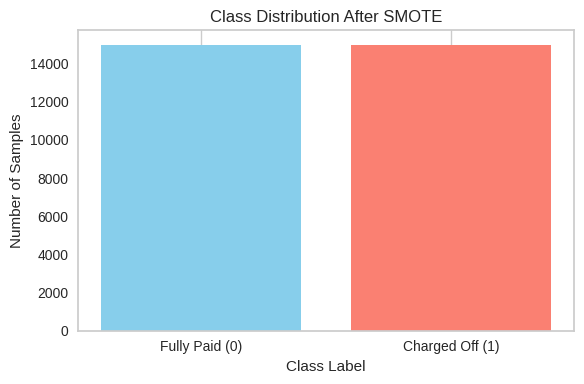

In [75]:
import matplotlib.pyplot as plt
from collections import Counter

# Example: after applying SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
print("Before SMOTE:", Counter(y_train_encoded))
X_train_bal, y_train_bal = smote.fit_resample(X_train_encoded, y_train_encoded)

# Count class distribution
class_counts = Counter(y_train_bal)
print(class_counts)

# Visualize class distribution
# Plot using pyplot
plt.figure(figsize=(6, 4))
plt.bar(class_counts.keys(), class_counts.values(), color=['skyblue', 'salmon'])
plt.title("Class Distribution After SMOTE")
plt.xlabel("Class Label")
plt.ylabel("Number of Samples")
plt.xticks([0, 1], labels=['Fully Paid (0)', 'Charged Off (1)'])
plt.grid(axis='y')
plt.tight_layout()
plt.show()

After SMOTE Both classes now have the same number of samples

In [76]:
## KMeans Smote
from imblearn.over_sampling import KMeansSMOTE

# Before oversampling
print("Before KMeansSMOTE:", Counter(y_train_encoded))

# Apply KMeansSMOTE
kmeans_smote = KMeansSMOTE(random_state=42, cluster_balance_threshold=0.05)
X_train_bal_km, y_train_bal_km = kmeans_smote.fit_resample(X_train_encoded, y_train_encoded)

# After oversampling
print("After KMeansSMOTE:", Counter(y_train_bal_km))

Before KMeansSMOTE: Counter({0: 14997, 1: 2503})
After KMeansSMOTE: Counter({1: 15003, 0: 14997})


In [73]:
## Write code
!pip install pycaret


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.3/46.3 kB 4.2 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of category-encoders to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 51.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.4/85.4 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 25.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 90.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18

In [78]:
import pandas as pd
from pycaret.classification import *

#Load or prepare your data (X and y should be combined in one DataFrame)
#  training data is X_train_encoded and y_train_encoded

# Combine into one DataFrame for PyCaret
df_pycaret = X_train_encoded.copy()
df_pycaret['loan_status'] = y_train_encoded  # target column

#  Initialize PyCaret
clf_setup = setup(data=df_pycaret,
                  target='loan_status',
                  session_id=42,
                  normalize=True,

                  verbose=False)

#  Compare models
best_model = compare_models()


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.1210
dt,Decision Tree Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.1530
ridge,Ridge Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.1340
rf,Random Forest Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.3240
ada,Ada Boost Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.1270
gbc,Gradient Boosting Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.6050
lda,Linear Discriminant Analysis,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.2730
et,Extra Trees Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.8090
xgboost,Extreme Gradient Boosting,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.4570
lightgbm,Light Gradient Boosting Machine,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.6530


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

**Train-test split**

Now that we have handled class imbalance, let's perform the train-test split. We have to do a few additional imports

In [ ]:
# Splitting our dataset between training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = ## Write code here

In [ ]:
## Check the samples


**Scaling**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
# Write code for MinMax Scaler


### Model Building and Model Evaluation

- Your task is to build at least 3 models and evaluate their performance
- Start with a baseline model such as logistic regression
- Build additional models like decision trees, random forests, XGboost, etc.
- Make sure you're checking for overfitting and underfitting
- Use cross-validation and hyperparamater tuning to fit the best models
- Evaluate each of the model using metrics such as accuracy, precision, recall, ROC-AUC score, etc.
- Select the best possible model that you will be using for classfication

Let's start off with the simplest model - Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
## Build the model
## Check its evaluation metrics

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

## Plot the Confusion Matrix


In [ ]:
from sklearn.metrics import classification_report
## Plot the classification report

Observations

- Document your observations

Next go ahead and build a decision tree and other models using the similar steps as above

Note
- You can build additional models as well
- Make sure you're performing the necessary steps to evaluate the model

Ensure that the following is done:

- The accuracy/precision/recall of the best model is at least between 80%
- All the necessary hyperparameter tuning, and regularization techniques (if needed) have been applied
- There's no overfitting

## Summary

Good work completing all the steps till now!
Now, go ahead and summarize your entire work and findings below:

-

-

-

---

### **Some Python libraries that are worth exploring for similar projects**
  - **tqdm**: A Python library used to create progress bars for iterables. It provides visual feedback on the progress of long-running operations, making it easier to track the execution time and estimate the remaining time.
  - **Low-code learning libraries** Use lazypredict or PyCaret to compare the performance of multiple Machine Learning models simultaneously. *The best part is that you only need to write fewer than 10 lines of code.*
  - **Explainable AI**: Understand model decisions through techniques like LIME or SHAP.